In [ ]:
Name - Dhangar sumedh dilip
Class - BE Artificial Intelligence and Data Science.
Roll No - 15
Title - Interacting with Web APIs (Analyzing Weather Data from OpenWeatherMap API.)

In [107]:
# 1. Register and obtain API key from OpenWeatherMap.


In [108]:
# 2. Interact with the OpenWeatherMap API using the API key to retrieve weather data for a specific location. 

In [111]:
import requests
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [112]:
api_key = 'c15c676d2f9d0dada63d7fa10c76ce01'
location = 'India'
url = f'http://api.openweathermap.org/data/2.5/forecast?q=India&appid=c15c676d2f9d0dada63d7fa10c76ce01&units=metric'
response = requests.get(url)
data = response.json()



In [113]:
if response.status_code == 200:
    "Data retrieved successfully for India"
else:
    data = response.json()
    f"Error: {data.get('message', 'Failed to retrieve data')}"


In [114]:
data

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1720774800,
   'main': {'temp': 15.82,
    'feels_like': 15.94,
    'temp_min': 15.82,
    'temp_max': 17.45,
    'pressure': 1016,
    'sea_level': 1016,
    'grnd_level': 819,
    'humidity': 95,
    'temp_kf': -1.63},
   'weather': [{'id': 500,
     'main': 'Rain',
     'description': 'light rain',
     'icon': '10d'}],
   'clouds': {'all': 98},
   'wind': {'speed': 1.35, 'deg': 139, 'gust': 2.18},
   'visibility': 10000,
   'pop': 1,
   'rain': {'3h': 2.38},
   'sys': {'pod': 'd'},
   'dt_txt': '2024-07-12 09:00:00'},
  {'dt': 1720785600,
   'main': {'temp': 18.21,
    'feels_like': 18.44,
    'temp_min': 18.21,
    'temp_max': 19.82,
    'pressure': 1015,
    'sea_level': 1015,
    'grnd_level': 818,
    'humidity': 90,
    'temp_kf': -1.61},
   'weather': [{'id': 501,
     'main': 'Rain',
     'description': 'moderate rain',
     'icon': '10d'}],
   'clouds': {'all': 99},
   'wind': {'speed': 1.74, 'deg': 188, 'gust': 2.6

In [115]:
# 3. Extract Relevant Weather Attributes.

In [116]:
weather_list = data['list']
weather_data = {'datetime': [], 'teampreature': [], 'humidity': [], 'wind_speed': [], 'precipitation': []}
for entry in weather_list:
    weather_data['datetime'].append(datetime.fromtimestamp(entry['dt']))
    weather_data['teampreature'].append(entry['main']['temp'])
    weather_data['humidity'].append(entry['main']['humidity'])
    weather_data['wind_speed'].append(entry['wind']['speed'])
    precipitation = entry['rain'].get('3h', 0) if 'rain' in entry else 0
    weather_data['precipitation'].append(precipitation)
    

In [117]:
import pandas as pd
df = pd.DataFrame(weather_data)
df.head()


,datetime,teampreature,humidity,wind_speed,precipitation
0,2024-07-12 14:30:00,15.82,95,1.35,2.38
1,2024-07-12 17:30:00,18.21,90,1.74,3.68
2,2024-07-12 20:30:00,20.88,83,2.04,3.51
3,2024-07-12 23:30:00,18.24,95,1.89,1.91
4,2024-07-13 02:30:00,14.46,99,1.71,4.05


In [118]:
# 4. Clean and Preprocess the Data.

In [119]:
df.isnull().sum()

datetime         0
teampreature     0
humidity         0
wind_speed       0
precipitation    0
dtype: int64

In [120]:
# 5. Perform Data Modelling.

In [37]:
avg_temp = df['teampreature'].mean()


In [39]:
avg_temp

17.82775

In [40]:
max_temp = df['teampreature'].max()
min_temp = df['teampreature'].min()

In [42]:
max_temp


25.93

In [43]:
min_temp

11.81

In [121]:
# 6. Visualize the Weather Data.

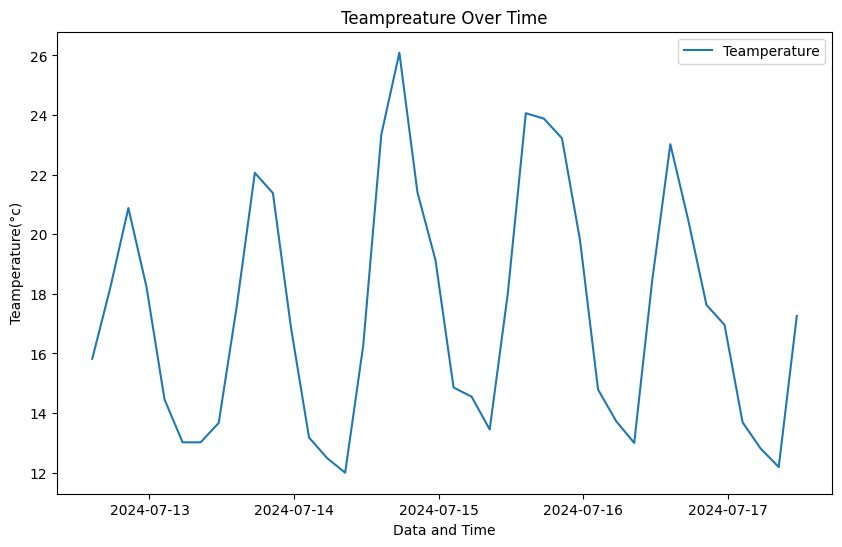

In [122]:
# 1. Line Chart
plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['teampreature'], label='Teamperature')
plt.xlabel('Data and Time')
plt.ylabel('Teamperature(°c)')
plt.title('Teampreature Over Time')
plt.legend()
plt.show()


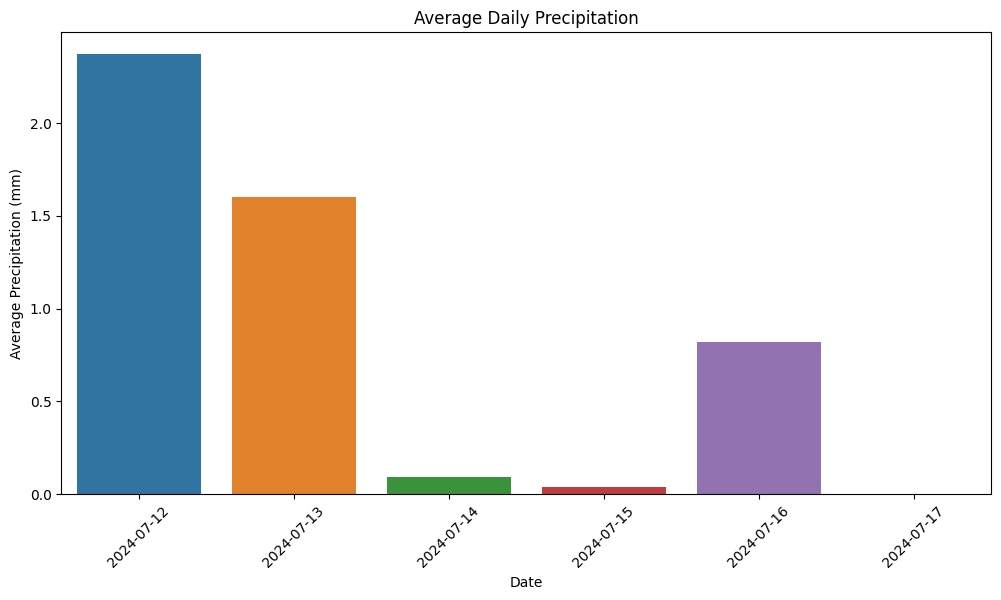

In [56]:
# 2. Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=daily_precipitation, x='date', y='precipitation')
plt.xlabel('Date')
plt.ylabel('Average Precipitation (mm)')
plt.title('Average Daily Precipitation')
plt.xticks(rotation=45)
plt.show()

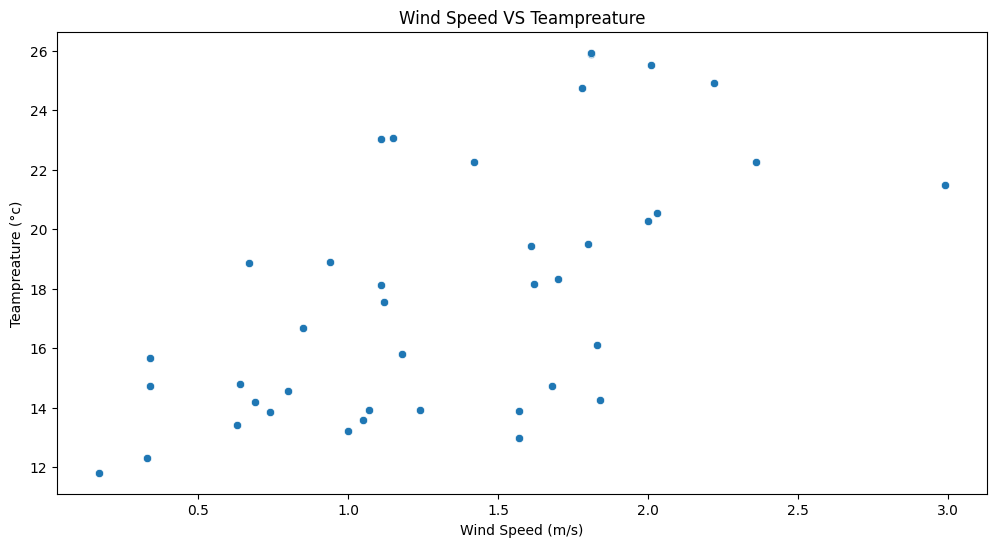

In [57]:
# 3. Scatter Plot.
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='wind_speed', y='teampreature')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Teampreature (°c)')
plt.title('Wind Speed VS Teampreature')
plt.show()

In [58]:
# 7. Apply Data Aggregation Techniques.

In [62]:
# 1. Daily Aggregation
daily_weather = df.resample('D').agg({'teampreature': 'mean', 'humidity': 'mean', 'wind_speed': 'max'})
daily_weather.head()


,teampreature,humidity,wind_speed
datetime,,,
2024-07-12,18.17000,90.600,2.03
2024-07-13,16.73500,83.000,2.99
2024-07-14,18.30750,70.125,2.22
2024-07-15,19.69875,68.875,2.01
2024-07-16,17.78000,81.250,1.62


In [63]:
# 2. Monthly Aggregation.
monthly_weather = df.resample('M').agg({'teampreature': 'mean', 'humidity': 'mean', 'wind_speed': 'max'})
monthly_weather.head()

,teampreature,humidity,wind_speed
datetime,,,
2024-07-31,17.82775,78.725,2.99


In [70]:
# 3. Seasnoal Aggregation.
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df.index.month.map(get_season)

seasonal_weather = df.groupby('season').agg({'temperature': 'mean', 'humidity': 'mean', 'wind_speed': 'max'})
seasonal_weather


,temperature,humidity,wind_speed
season,,,
Summer,26.0,84.2,9


In [91]:
# 8. Incorporate Geographical Information



In [92]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
# 1. Fetch Weather Data for Multiple Locations.


# Replace 'your_api_key' with your actual API key
api_key = 'c15c676d2f9d0dada63d7fa10c76ce01'

locations = [
    {'name': 'New York', 'lat': 40.7128, 'lon': -74.0060},
    {'name': 'London', 'lat': 51.5074, 'lon': -0.1278},
    {'name': 'Tokyo', 'lat': 35.6895, 'lon': 139.6917},
    # Add more locations as needed
]

weather_data = []

for loc in locations:
    url = f'http://api.openweathermap.org/data/2.5/weather?lat={loc["lat"]}&lon={loc["lon"]}&appid={api_key}&units=metric'
    response = requests.get(url)
    data = response.json()
    
    if response.status_code == 200:
        weather_data.append({
            'name': loc['name'],
            'temperature': data['main']['temp'],
            'humidity': data['main']['humidity'],
            'wind_speed': data['wind']['speed'],
            'latitude': loc['lat'],
            'longitude': loc['lon']
        })
    else:
        print(f"Error fetching data for {loc['name']}: {data.get('message', 'Unknown error')}")




In [95]:
weather_data

[{'name': 'New York',
  'temperature': 23.3,
  'humidity': 73,
  'wind_speed': 1.54,
  'latitude': 40.7128,
  'longitude': -74.006},
 {'name': 'London',
  'temperature': 13.5,
  'humidity': 87,
  'wind_speed': 4.12,
  'latitude': 51.5074,
  'longitude': -0.1278},
 {'name': 'Tokyo',
  'temperature': 24.13,
  'humidity': 91,
  'wind_speed': 1.03,
  'latitude': 35.6895,
  'longitude': 139.6917}]

In [96]:
# 2. Create a Geospatial visualization using Folium.
# Create a map centered at a specific location (e.g., New York)
map_center = [40.7128, -74.0060]
mymap = folium.Map(location=map_center, zoom_start=3)

# Add markers for each location with weather information
for data in weather_data:
    popup_text = f"<b>{data['name']}</b><br>Temperature: {data['temperature']}°C<br>Humidity: {data['humidity']}%<br>Wind Speed: {data['wind_speed']} m/s"
    folium.Marker(location=[data['latitude'], data['longitude']], popup=popup_text).add_to(mymap)

# Save the map as an HTML file
mymap.save('weather_map.html')



In [123]:
mymap

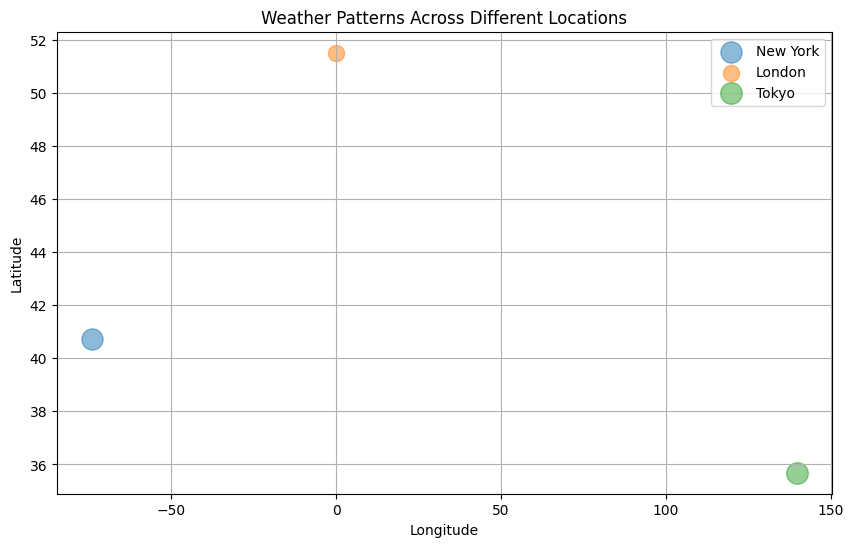

In [98]:
# 3. Viualize Weather Patterns on a Static Map using Matplotlib.
# Plot each location with a scatter plot based on temperature
plt.figure(figsize=(10, 6))

for data in weather_data:
    plt.scatter(data['longitude'], data['latitude'], s=data['temperature']*10, alpha=0.5, label=data['name'])

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Weather Patterns Across Different Locations')
plt.legend()
plt.grid(True)
plt.show()

In [105]:
# 9. Explore and Visualize Realationships.

               temperature  humidity  wind_speed  precipitation
temperature       1.000000  0.988483    0.800000       0.176777
humidity          0.988483  1.000000    0.864923       0.294875
wind_speed        0.800000  0.864923    1.000000       0.353553
precipitation     0.176777  0.294875    0.353553       1.000000


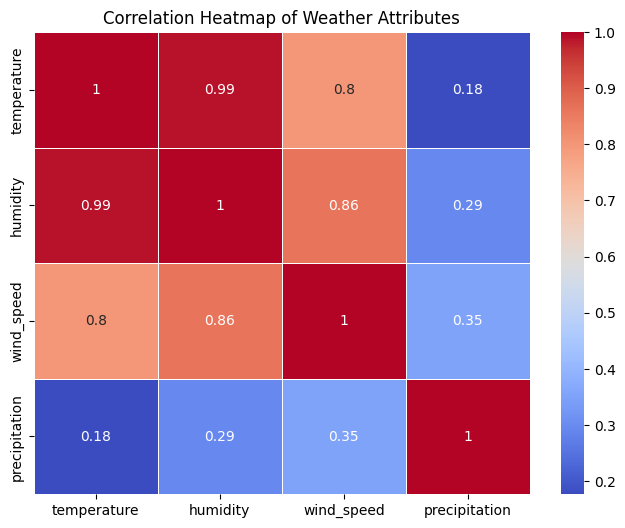

In [106]:
# Calculate correlation matrix
correlation_matrix = df[['temperature', 'humidity', 'wind_speed', 'precipitation']].corr()
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Weather Attributes')
plt.show()